<a href="https://colab.research.google.com/github/smritip/dtw-for-classical-music-prod/blob/master/chroma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Chromagrams from .wav Files

In [0]:
import math
import numpy as np
import librosa

from matplotlib import pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

In [0]:
# Globals
fft_len = 4096  # FFT window length
hop_size = 2048  # FFT hop size
fs = 22050  # sample rate

In [0]:
def wav_to_chroma(path_to_wav_file):

	# generate wav using librosa
	wav, wav_fs = librosa.load(path_to_wav_file)
	assert(wav_fs == fs)

	# create chroma (STFT --> spectrogram --> chromagram)
	stft = create_stft(wav)
	chroma = create_chroma(stft)

	return chroma

In [0]:
def create_stft(wav):
	L = fft_len
	H = hop_size

	# use centered window by zero-padding
	x = np.concatenate((np.zeros(int(L / 2)), wav))

	N = len(x)

	num_bins = 1 + int(L / 2)
	num_hops = int(((N - L) / H) + 1)

	stft = np.empty((num_bins, num_hops), dtype=complex)

	M = num_hops

	for m in range(M):
		section = x[(m * H):((m * H) + L)]
		win = section * np.hanning(len(section))
		stft[:, m] = np.fft.rfft(win)

	return stft

In [0]:
def create_chroma(ft, normalize=True):
	spec = np.abs(ft) ** 2
	chromafb = librosa.filters.chroma(fs, fft_len)
	raw_chroma = np.dot(chromafb, spec)
	if not normalize:
		return raw_chroma
	chroma = librosa.util.normalize(raw_chroma, norm=2, axis=0)
	return chroma

# Testing

In [6]:
## See https://colab.research.google.com/drive/1--xY78_ZTFwpI7F2ZfaeyFKiAOG2nkwd for how to load wave files from GitHub

# Load sound file from GitHub
!wget https://github.com/smritip/dtw-for-classical-music-prod/blob/master/audio/maroon5_thislove_og.wav
!wget https://github.com/smritip/dtw-for-classical-music-prod/blob/master/audio/maroon5_thislove_acoustic.wav
  
# Erase output after import
from IPython.display import clear_output
clear_output()

print("maroon5_thislove_og and maroon5_thislove_acoustic loaded")

maroon5_thislove_og and maroon5_thislove_acoustic loaded


In [0]:
# TODO(smritip): figure out why the above didn't work (had to add files manually)

In [8]:
# Load the file on an object
data = wavfile.read('maroon5_thislove_og.wav')

/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (100, 100)

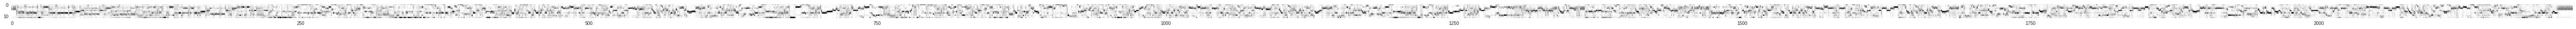

In [10]:
chroma_1 = wav_to_chroma("maroon5_thislove_og.wav")
plt.imshow(chroma_1)


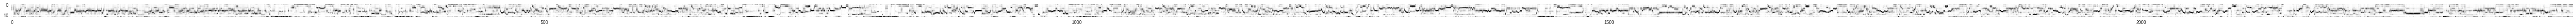

In [11]:
chroma_2 = wav_to_chroma("maroon5_thislove_acoustic.wav")
plt.imshow(chroma_2)